## Problem 3.Convolutional neural network (CNN) 

In [1]:
# Python 3.6
# Shaoojun Yu
# Apr 20, 2019

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
tf.__version__

'1.13.1'

In [2]:
dataset = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

# split data
x_train_new = []
y_train_new = []
x_validation = []
y_validation = []
for y in np.unique(y_train):
    idx = np.where(y_train == y)[0]
    X = x_train[idx]
    y = y_train[idx]
    X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    x_train_new.extend(X_trn)
    y_train_new.extend(y_trn)
    x_validation.extend(X_val)
    y_validation.extend(y_val)

#reshape and one-hot encode
x_train_new = np.array(x_train_new)
y_train_new = keras.utils.to_categorical(y_train_new)
x_validation = np.array(x_validation)
y_validation = keras.utils.to_categorical(y_validation)

x_train_new = x_train_new.reshape(x_train_new.shape + (1,))
x_validation = x_validation.reshape(x_validation.shape + (1,))

x_test = x_test.reshape(x_test.shape + (1,))
y_test = keras.utils.to_categorical(y_test)

In [3]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='random_uniform',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
history = model.fit(x_train_new, y_train_new, 
                    validation_data=(x_validation, y_validation),
                    epochs=15,
                    verbose=1)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
48000/48000 [==============================] - 15s 320us/sample - loss: 0.5469 - acc: 0.7965 - val_loss: 0.4084 - val_acc: 0.8482
Epoch 2/15
48000/48000 [==============================] - 15s 306us/sample - loss: 0.3458 - acc: 0.8721 - val_loss: 0.3230 - val_acc: 0.8823
Epoch 3/15
48000/48000 [==============================] - 15s 302us/sample - loss: 0.2894 - acc: 0.8925 - val_loss: 0.2839 - val_acc: 0.8982
Epoch 4/15
48000/48000 [==============================] - 14s 302us/sample - loss: 0.2533 - acc: 0.9054 - val_loss: 0.2690 - val_acc: 0.9012
Epoch 5/15
48000/48000 [==============================] - 15s 303us/sample - loss: 0.2229 - acc: 0.9156 - val_loss: 0.2784 - val_acc: 0.9007
Epoch 6/15
48000/48000 [==============================] - 15s 306us/sample - loss: 0.1987 - acc: 0.9241 - val_loss: 0.2478 - val_acc: 0.9158
Epoch 7/15
48000/48000 [==============================] 

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               147584    
__________

### 1） Model Summary
The number of parameters in CNN is much larger than that in fully connected neural network. The usage of CNNs are motivated by the fact that they are able to learn relevant features from an image at different levels . This is feature learning. Conventional neural networks cannot do this.

### 2) Learning Curve

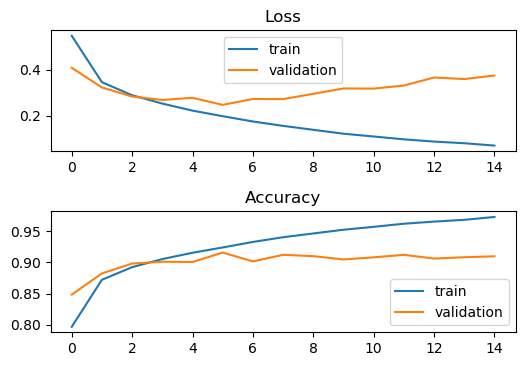

In [8]:
# plot loss during training
plt.figure(dpi=100)
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()

#### From the learning curve, we can observe overfitting, because the training accuracy is much higher than validation accuracy.

### 2) Test accuracy

In [10]:
model.evaluate(x_test, y_test)[1]

10000/10000 [==============================] - 1s 93us/sample - loss: 0.3935 - acc: 0.9060


0.906

### 3) Add Dropout and L2 regularization

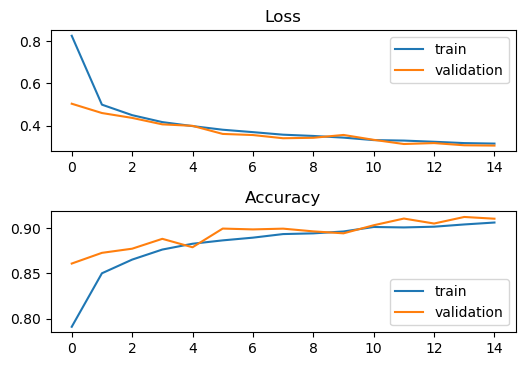

In [12]:
DROPOUT = 0.3

# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(Dropout(DROPOUT))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(DROPOUT))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dropout(DROPOUT))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new, 
                    validation_data=(x_validation, y_validation),
                    epochs=15,
                    verbose=0)

# plot loss during training
plt.figure(dpi=100)
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()

### 3) Test Accuracy

In [14]:
model.evaluate(x_test, y_test)[1]

10000/10000 [==============================] - 1s 96us/sample - loss: 0.3186 - acc: 0.9057


0.9057

In [15]:
model.save('my_model_2.h5')